# Graph Visualization with Python

A **Graph** is a non-linear data structure consisting of *nodes* and *edges*. 

The nodes are sometimes also referred to as vertices and the edges are lines or arcs that connect any two nodes in the graph

The power of graphs is already well known. 
**Graphs** can **represent complex data structures and relationships in various domains**.
For example:
* social networks, 
* recommendation engines, 
* transportation systems,
etc.

[**NetworkX** ](https://networkx.org/)is the well-known Python library for studying graphs and networks.
* is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

But we'll explore a few additional libraries for visualizing graphs in Python:
* [Pyvis](https://pyvis.readthedocs.io/en/latest/tutorial.html)
* Jaal

## Pyvis

The pyvis library is meant for quick generation of visual network graphs with minimal python code. 

### Installation

Install with pip:

`$ pip install pyvis`

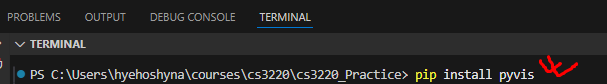

In [2]:
from pyvis.network import Network #All networks must be instantiated as a Network class instance

Let's add **[Pandas](https://pandas.pydata.org/)** - a data manipulation package in Python for tabular data. 

[Python pandas Tutorial: The Ultimate Guide for Beginners](https://www.datacamp.com/tutorial/pandas)

Installing pandas is straightforward; just use the pip install command in your terminal:

`$ pip install pandas`

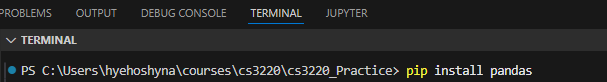

In [4]:
import pandas as pd #To begin working with pandas, import the pandas Python package 

### Example 1: social network visualizing

Let’s visualize an actual social network. We’ll use a dataset containing [Facebook friend lists](https://snap.stanford.edu/data/ego-Facebook.html)

In [6]:
#Loading the data
data = pd.read_csv("data/facebook_combined.txt", sep=" ", header=None)
print(data.size) #this dataset is quite big 

176468


In [7]:
data.head(5)

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [5]:
data.tail(5)

,0,1
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038
88233,4031,4038


In [8]:
data.iloc[:,0].unique().size # N-of persons 

3663

Let's limit our visualization to 100 samples

In [9]:
sample = data.sample(100, random_state = 42)

In [10]:
sample.head(5)

,0,1
23139,1188,1366
32340,1496,1630
42613,1958,2645
81545,3204,3280
13436,946,1181


In [11]:
sample.columns = ["person1", "person2"]
sample.head(3)

,person1,person2
23139,1188,1366
32340,1496,1630
42613,1958,2645


To construct a **network graph**, start by creating an **instance of the Network object**.

In [35]:
net = Network( heading="Lab1. Examples of Graphs",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%"
) # do this

In [131]:
net = Network(notebook = True, cdn_resources = "remote", #  For visualization within a notebook
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
)

We'll set the nodes to be a unique list of people 

In [13]:
import numpy as np

In [14]:
type(sample['person1'].values)

numpy.ndarray

In [36]:
#nodes = list(set([sample['person1'].values,sample['person2'].values]))
nodes=np.unique(np.concatenate((sample['person1'].values,sample['person2'].values),0))
nodes

array([   0,    9,  152,  246,  279,  285,  329,  395,  462,  479,  483,
        532,  573,  600,  606,  627,  637,  659,  662,  672,  696,  720,
        727,  745,  800,  834,  903,  946,  952,  980, 1029, 1076, 1082,
       1113, 1158, 1179, 1181, 1188, 1201, 1211, 1227, 1250, 1267, 1271,
       1277, 1284, 1290, 1322, 1332, 1366, 1381, 1399, 1420, 1423, 1496,
       1522, 1538, 1539, 1577, 1584, 1587, 1603, 1604, 1611, 1616, 1630,
       1643, 1647, 1648, 1714, 1720, 1735, 1750, 1835, 1857, 1870, 1893,
       1912, 1926, 1954, 1958, 1975, 1981, 1983, 2010, 2040, 2045, 2047,
       2072, 2077, 2081, 2086, 2098, 2115, 2123, 2133, 2135, 2142, 2147,
       2161, 2183, 2185, 2189, 2216, 2223, 2228, 2264, 2292, 2323, 2328,
       2332, 2338, 2340, 2354, 2371, 2376, 2399, 2403, 2408, 2414, 2415,
       2433, 2451, 2462, 2467, 2477, 2494, 2516, 2518, 2520, 2549, 2555,
       2556, 2589, 2597, 2604, 2608, 2611, 2628, 2645, 2663, 2741, 2780,
       2796, 2849, 2880, 2881, 2901, 2944, 2955, 29

In [ ]:
net.add_nodes(nodes) #!!!! don't run

When using the `network.Network.add_nodes()` method optional keyword arguments can be passed in to add properties to these nodes as well. 

The valid properties in this case are: ['size', 'value', 'title', 'x', 'y', 'label', 'color']

In [37]:
nodes.size

193

We can add the **label** as a label attribute in the** add_node** function. The label argument is the string that will be visible alongside the node in the final visualization.

In [38]:
# rebuild the graph from the very beginning
net.add_nodes(nodes, title=[str(node) for node in nodes]) # do this

We use the values of each row as source and destination nodes for each relationship

In [39]:
edges = sample.values.tolist()
edges[:5]

[[1188, 1366], [1496, 1630], [1958, 2645], [3204, 3280], [946, 1181]]

In [40]:
len(edges)

100

In [41]:
net.add_edges(edges)

In [42]:
from IPython.display import display, HTML

In [43]:

neighbor_map = net.get_adj_list()
neighbor_map

{0: {152, 279},
 9: {329},
 152: {0},
 246: {285},
 279: {0},
 285: {246},
 329: {9},
 395: {479},
 462: {532},
 479: {395},
 483: {1113},
 532: {462},
 573: {672},
 600: {659},
 606: {1179},
 627: {662},
 637: {1616},
 659: {600},
 662: {627},
 672: {573},
 696: {834},
 720: {745},
 727: {800},
 745: {720},
 800: {727},
 834: {696},
 903: {1648},
 946: {1181},
 952: {1603},
 980: {1211},
 1029: {1201},
 1076: {1735},
 1082: {1423},
 1113: {483},
 1158: {1611},
 1179: {606},
 1181: {946},
 1188: {1366},
 1201: {1029},
 1211: {980},
 1227: {1893},
 1250: {1584},
 1267: {1399},
 1271: {1604},
 1277: {1857},
 1284: {1587},
 1290: {1522},
 1322: {1381},
 1332: {1870},
 1366: {1188},
 1381: {1322},
 1399: {1267},
 1420: {1538},
 1423: {1082},
 1496: {1630},
 1522: {1290},
 1538: {1420},
 1539: {1603},
 1577: {2047},
 1584: {1250},
 1587: {1284},
 1603: {952, 1539},
 1604: {1271},
 1611: {1158},
 1616: {637},
 1630: {1496},
 1643: {1835},
 1647: {1720},
 1648: {903},
 1714: {1750},
 1720: {1

https://www.askpython.com/python/examples/customizing-pyvis-interactive-network-graphs

In [44]:
# add neighbor data to node hover data
for node in net.nodes:
    node["title"] += " neighbors: "+ "#".join(str(x) for x in neighbor_map[node["id"]])
    

We will be adding the **size** of the node in the form of the **value** attribute to scale the node to a particular value (N of neighbors in our case)

In [45]:
for node in net.nodes:
    node["value"] = len(neighbor_map[node["id"]])
    #print(len(neighbor_map[node["id"]]))

Adding a Splash of Color to Your Nodes.  We will be adding the color in the form of the **color** attribute that can also take a plain HTML color like red or blue


In [46]:
nodeColors={
    1:"blue",
    2: "red",
    3: "green"
}

In [48]:
for node in net.nodes:
    node["color"] = nodeColors[node["value"]]

In [49]:
for node in net.nodes[:3]:
    print(node["color"])

red
blue
blue


Diversifying Node Shapes for Visual Interest. 

There are a number of shapes available, including squares, stars, polygons, and others. There are 2 types of nodes. One type has the label inside of it and the other type has the label underneath it.

In [52]:
nodeShapes={
    1:"box",
    2: "star",
    3: "database"
}

In [53]:
for node in net.nodes:
    node["shape"] = nodeShapes[node["value"]]

You can also show the UI for you to dynamically alter the physics of the graph by using the show_buttons() function

In [54]:
net.show_buttons(['physics'])

In [55]:
net.show("graph1.html",notebook=False)

graph1.html


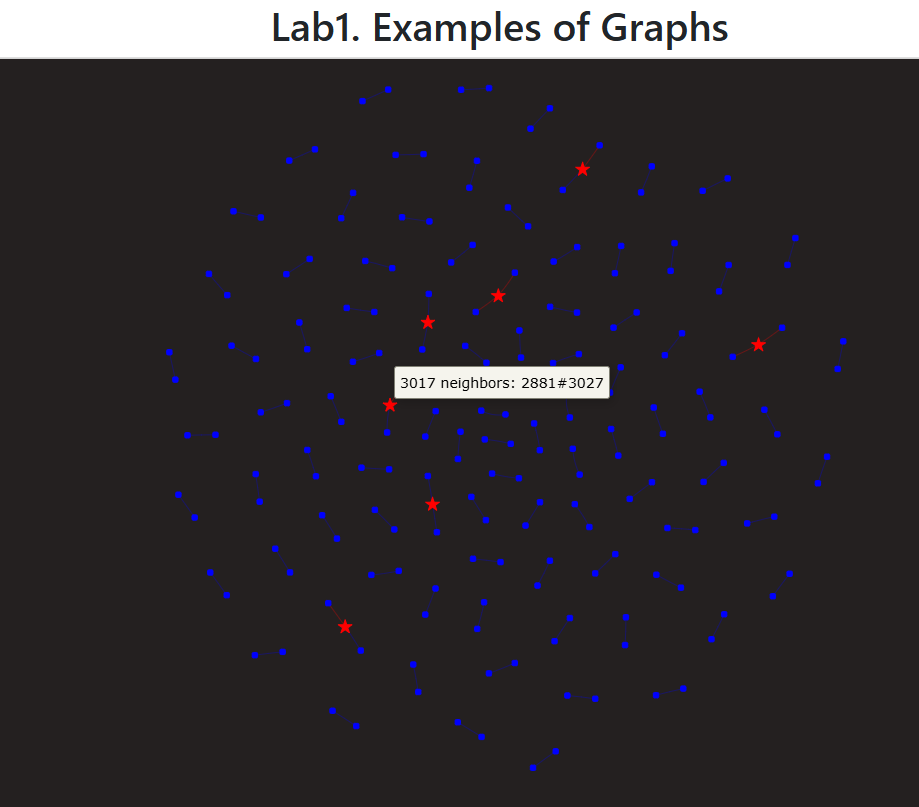

### Example 2: Flight Delays and Cancellations visualizing

The flight delay and cancellation data was collected and published by the  U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics 

In [57]:
#Loading the data
flights_df = pd.read_csv("data/flights_df_1000.csv", usecols = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT","YEAR"])
print(flights_df.size) #this dataset is quite big 

3000


In [58]:
flights_df.head()

,YEAR,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,2015,ANC,SEA
1,2015,LAX,PBI
2,2015,SFO,CLT
3,2015,LAX,MIA
4,2015,SEA,ANC


In [59]:
flights_df.tail()

,YEAR,ORIGIN_AIRPORT,DESTINATION_AIRPORT
995,2015,SAT,ELP
996,2015,TPA,BWI
997,2015,TUS,DEN
998,2015,SNA,EWR
999,2015,RDU,CLT


In [60]:
flights_df.ORIGIN_AIRPORT.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [61]:
flights_df1=flights_df[(flights_df.DESTINATION_AIRPORT.str.len()<=3)&(flights_df.ORIGIN_AIRPORT.str.len()<=3)]
flights_df1.head()

,YEAR,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,2015,ANC,SEA
1,2015,LAX,PBI
2,2015,SFO,CLT
3,2015,LAX,MIA
4,2015,SEA,ANC


In [62]:
df_between_airports = flights_df1.groupby(by=["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]).count().reset_index()
df_between_airports

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,YEAR
0,ABE,ATL,1
1,ABE,DTW,1
2,ABI,DFW,1
3,ABQ,DAL,1
4,ABQ,HOU,1
...,...,...,...
843,VPS,ATL,1
844,VPS,DFW,1
845,VPS,IAH,1
846,XNA,DFW,1


In [63]:
df_between_airports.rename(columns={"YEAR":"N_fligths"}, inplace=True)
df_between_airports.sort_values(by="N_fligths", ascending=False, inplace=True)
df_between_airports.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,N_fligths
20,ANC,SEA,8
356,JFK,LAX,4
756,SFO,IAH,4
374,LAS,DFW,3
308,HNL,KOA,3


In [64]:
df_between_airports.tail()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,N_fligths
843,VPS,ATL,1
844,VPS,DFW,1
845,VPS,IAH,1
846,XNA,DFW,1
3,ABQ,DAL,1


In [65]:
df_between_airports.shape

(848, 3)

 We are dividing the values in the N_flights column by 4693 because later on we will be using these values as the linewidth of the edges linking 2 airports

In [66]:
df_between_airports['Perc']=df_between_airports["N_fligths"]/df_between_airports.shape[0] #the Nflights has been normalized 
df_between_airports.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,N_fligths,Perc
20,ANC,SEA,8,0.009434
356,JFK,LAX,4,0.004717
756,SFO,IAH,4,0.004717
374,LAS,DFW,3,0.003538
308,HNL,KOA,3,0.003538


The number of flights originating from each airport: 

In [67]:
node_sizes=df_between_airports.groupby("ORIGIN_AIRPORT").count()["N_fligths"]
node_sizes


ORIGIN_AIRPORT
ABE    2
ABI    1
ABQ    3
ABR    1
ACT    1
      ..
TXK    1
TYR    1
TYS    2
VPS    3
XNA    2
Name: N_fligths, Length: 221, dtype: int64

In [68]:
node_sizes.info()

<class 'pandas.core.series.Series'>
Index: 221 entries, ABE to XNA
Series name: N_fligths
Non-Null Count  Dtype
--------------  -----
221 non-null    int64
dtypes: int64(1)
memory usage: 11.6+ KB


Plotting the graph

In [226]:
from pyvis.network import Network

In [ ]:
net = Network(
    directed = True,            # directed graph
    bgcolor = "black",          # background color of graph 
    font_color = "yellow",      # use yellow for node labels
    cdn_resources = 'in_line',  # make sure Jupyter notebook can display correctly
    height = "1000px",          # height of chart
    width = "100%",             # fill the entire width    
    ) # do not run

In [227]:
netFlights = Network(heading="Lab1. Building Interactive Network of flights",
                bgcolor ="#242020",
                font_color = "white",
                height = "1000px",
                width = "100%",
                directed = True,
                filter_menu=True
                
                
) # do this !!!!!!!!!!!!!!!!!!!!!!!!

In [228]:
# get all the nodes from the two columns
nodes = list(set([*df_between_airports['ORIGIN_AIRPORT'], 
                  *df_between_airports['DESTINATION_AIRPORT']
                 ]))

In [229]:
nodes[:10]

['BOS', 'SJU', 'SNA', 'LFT', 'ABQ', 'BPT', 'LBE', 'COU', 'FWA', 'ROW']

In [230]:
len(nodes)

227

In [231]:
node_sizes

ORIGIN_AIRPORT
ABE    2
ABI    1
ABQ    3
ABR    1
ACT    1
      ..
TXK    1
TYR    1
TYS    2
VPS    3
XNA    2
Name: N_fligths, Length: 221, dtype: int64

In [232]:
def makeEdgeTitle(x):
    return "N_flights: "+str(x)

In [233]:
df_between_airports["edge_titles"]=df_between_airports["N_fligths"].apply(makeEdgeTitle)
df_between_airports.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,N_fligths,Perc,edge_titles
20,ANC,SEA,8,0.009434,N_flights: 8
356,JFK,LAX,4,0.004717,N_flights: 4
756,SFO,IAH,4,0.004717,N_flights: 4
374,LAS,DFW,3,0.003538,N_flights: 3
308,HNL,KOA,3,0.003538,N_flights: 3


In [234]:
# extract the edges between airports
edges = df_between_airports.loc[:,["ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "edge_titles"]].values.tolist()
edges[:10]

[['ANC', 'SEA', 'N_flights: 8'],
 ['JFK', 'LAX', 'N_flights: 4'],
 ['SFO', 'IAH', 'N_flights: 4'],
 ['LAS', 'DFW', 'N_flights: 3'],
 ['HNL', 'KOA', 'N_flights: 3'],
 ['GEG', 'DEN', 'N_flights: 3'],
 ['LAX', 'IAH', 'N_flights: 3'],
 ['BOS', 'ORD', 'N_flights: 3'],
 ['JFK', 'SFO', 'N_flights: 3'],
 ['JFK', 'SJU', 'N_flights: 3']]

In [235]:
edges_width=df_between_airports.Perc.values.tolist()
edges_width[:10]

[0.009433962264150943,
 0.0047169811320754715,
 0.0047169811320754715,
 0.003537735849056604,
 0.003537735849056604,
 0.003537735849056604,
 0.003537735849056604,
 0.003537735849056604,
 0.003537735849056604,
 0.003537735849056604]

In [236]:
len(edges_width)

848

In [237]:
# add the nodes, the value is to set the size of the nodes
netFlights.add_nodes(nodes)

In [238]:
# add the edges
netFlights.add_edges(edges)

In [239]:
netFlights.show("graph2.html", notebook=False)

graph2.html


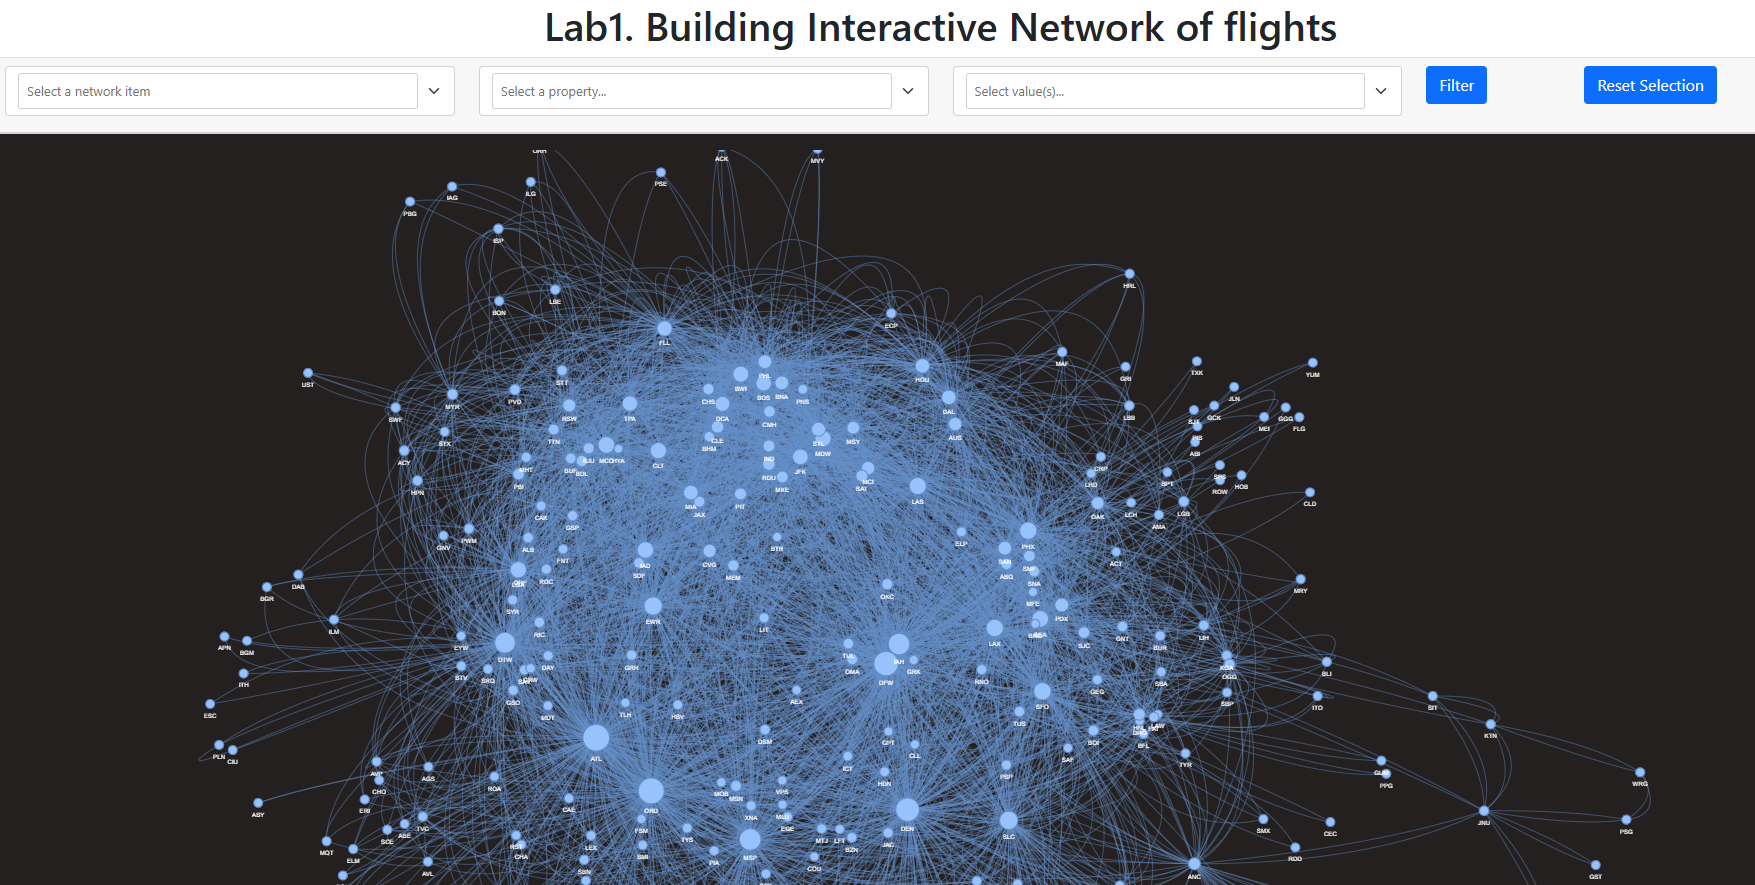

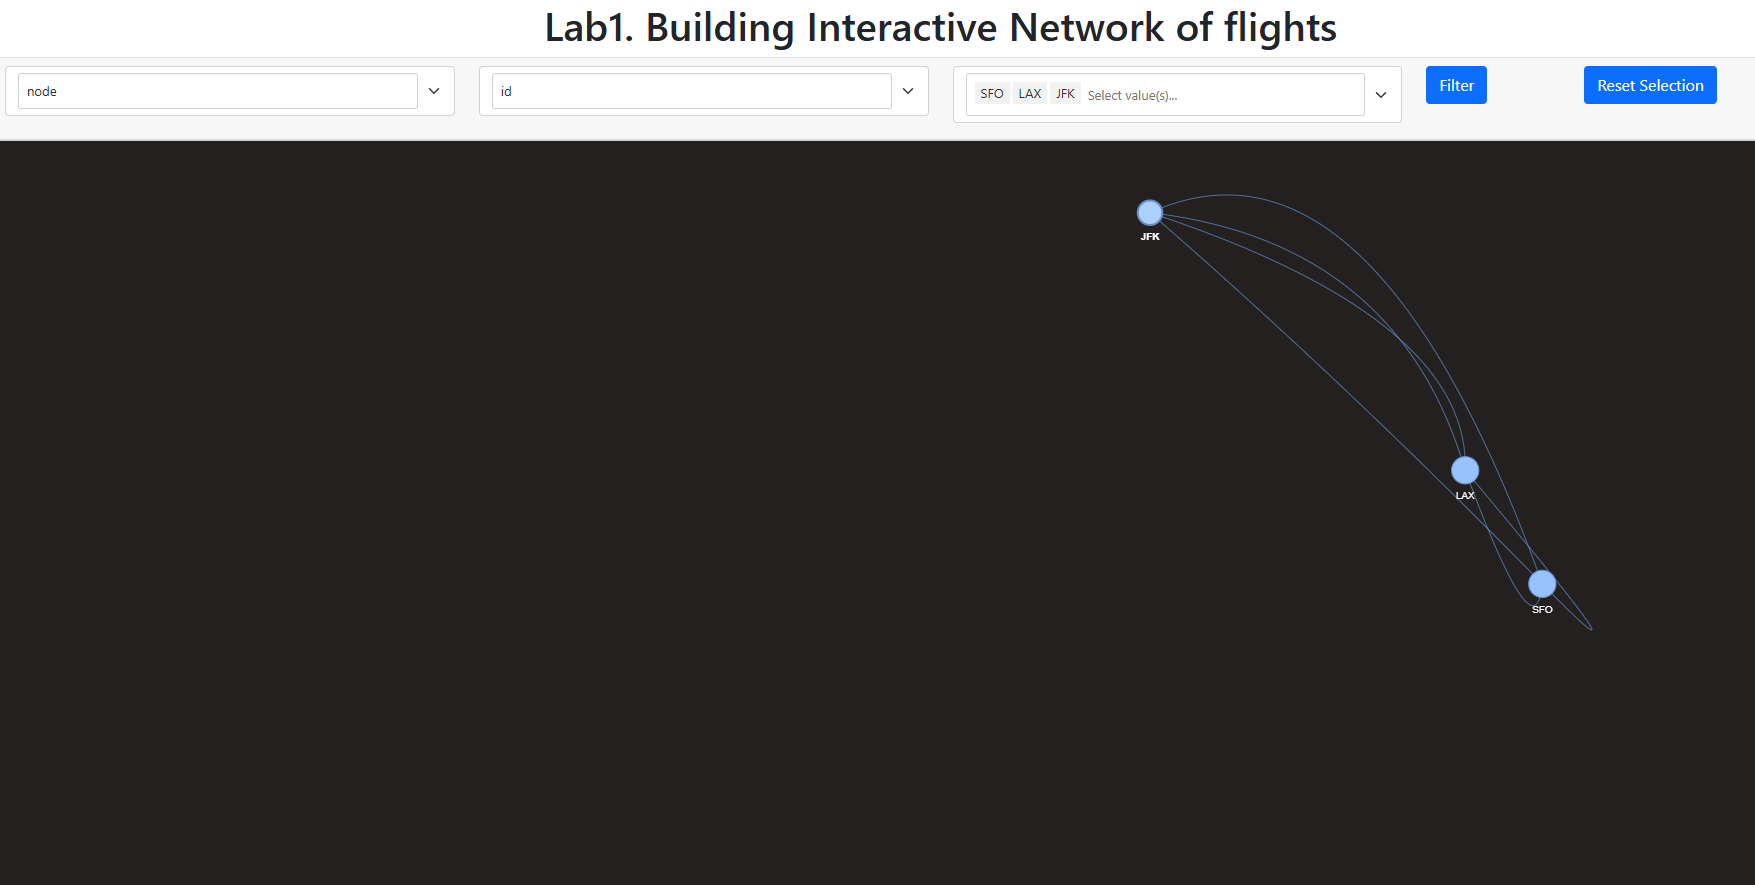

In [5]:
flights_df.head()

,YEAR,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,2015,ANC,SEA
1,2015,LAX,PBI
2,2015,SFO,CLT
3,2015,LAX,MIA
4,2015,SEA,ANC


Making a copy of 1st 1000 flights and saving it into the csv-file

In [6]:
flights_df_1000=flights_df.iloc[:1000,:]

In [7]:
flights_df_1000.shape

(1000, 3)

In [8]:
flights_df_1000.to_csv("data/flights_df_1000.csv")